# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Задачи проекта
Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.
# Описание проекта
На основе данных сервиса Яндекс.Недвижимость определена рыночная стоимость объектов недвижимости разного типа, типичные параметры квартир, в зависимости от удаленности от центра. Проведена предобработка данных. Добавлены новые данные. Построены гистограммы, боксплоты, диаграммы рассеивания.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div class="alert alert-block alert-info">
<b> Общая гистограмма для всех числовых значений. На первый взгляд графики выглядят очень логично, выбивающихся значений не так много

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

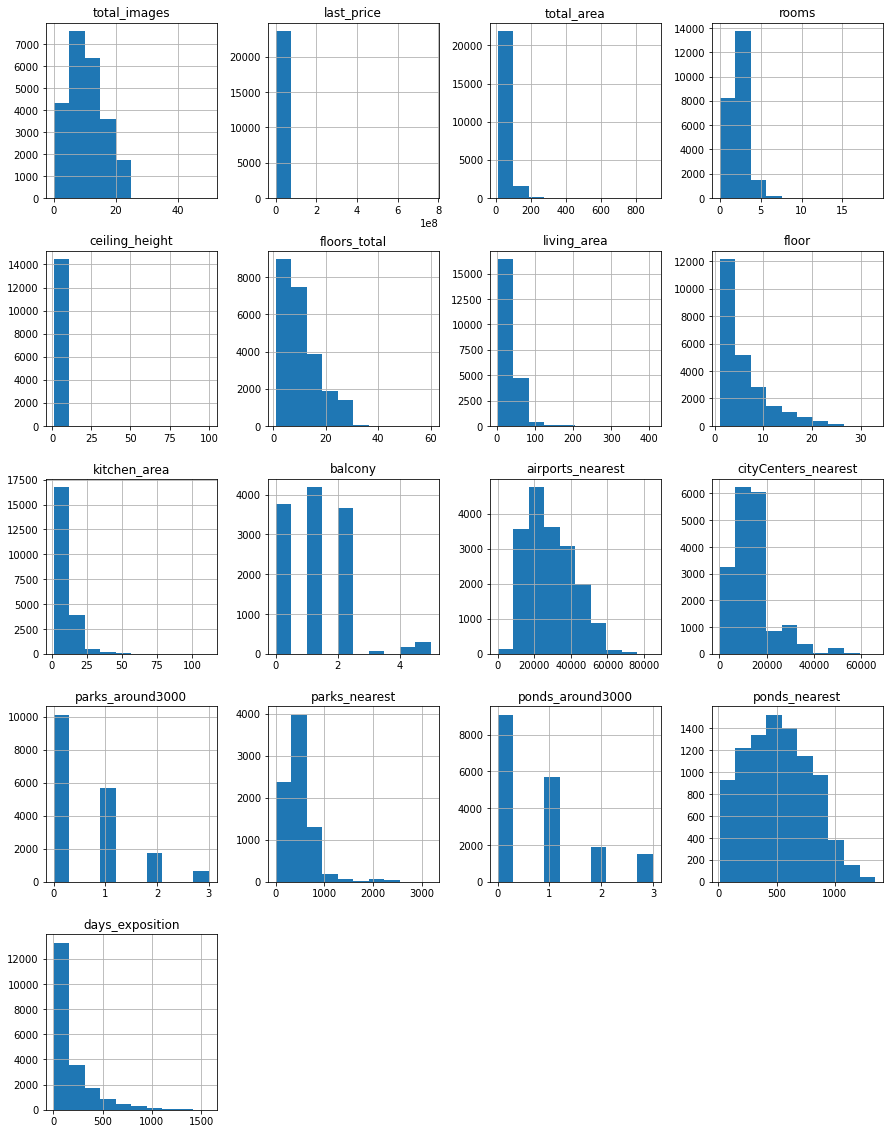

In [3]:
data.hist(figsize=(15, 20))

### Предобработка данных

#### Работа с пропусками

In [4]:
data.isna().sum() #пропусков немало

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">
<b> Пропуски в столбце 'is_apartment' могли случиться, если, например, продавец не указал, что квартира - не апартаменты, поэтому заменим пропуски на False. Аналогично с пропусками в столбцах 'balcony' 'parks_around3000''ponds_around3000'

In [5]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0.0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-block alert-info">
<b> Пропуски в данных, которые составляли пользователи, имеют скорее всего человеческий фактор. Пропуски в картографических данных могут быть связаны с некорректным заполнением столбца locality_name или неточности в адресе, в отстутствие, например, парка в 3 км от квартиры.

#### Типы Данных

In [6]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], 
                                             format = '%Y.%m.%dT%H:%M:%S')
data.dtypes


total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

<div class="alert alert-block alert-info">
<b> Столбец first_day_exposition содержал дату, соответсвенно строковые значения следует перевести в формат date_time, для последующих действий со столбцом

#### Обработка дубликатов

In [8]:
data.duplicated().sum() #проверяем есть ли явные дубликаты в данных

0

In [9]:
# а что с неявными?
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

<div class="alert alert-block alert-info">
<b> В столбце с названиями можем заметить неявные дубликаты. Заменим 'ё' на 'е' в навзаниях местности. Также заменим синонимы 'поселок городского типа', 'городской поселок' на 'поселок'.

In [10]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок', regex=True)

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

#### Убираем редкие значения

<div class="alert alert-block alert-info">
<b> В столбце 'ceiling_height' высота потолка принамает нереалистичные значения 1, 25, 100 м. Такие выбивающиеся значения следует исключить или преобразовать

In [11]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [12]:

data['ceiling_height'] = data['ceiling_height'].replace(to_replace=[20, 22.6, 24, 25, 26, 27, 27.5, 32], value=[2, 2.26, 2.4, 2.5, 2.6, 2.7, 2.75, 3.2])
data['ceiling_height'] = data[(data['ceiling_height']<=6) & (data['ceiling_height']>=2.2)]['ceiling_height']
data['ceiling_height'].sort_values().unique()


array([2.2 , 2.25, 2.26, 2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49,
       2.5 , 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 ,
       2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71,
       2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82,
       2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93,
       2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04,
       3.05, 3.06, 3.07, 3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15,
       3.16, 3.17, 3.18, 3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27,
       3.28, 3.29, 3.3 , 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38,
       3.39, 3.4 , 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 ,
       3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62,
       3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 ,
       3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98,
       4.  , 4.06, 4.1 , 4.14, 4.15, 4.19, 4.2 , 4.

<div class="alert alert-block alert-info">
<b>Сегодня минимальной нормой в России считается высота потолка 2,2 метра, поэтому потолки ниже этого значения мы удалили. Высота потолка в квартире не ограничена нормой, но здравый смысл подсказывает, что максимальные значения - в районе 5-6 метров. Аномально высокие потолки (больше 22 метров) скорее всего указаны в дм, а значит их следует заменить на вещественные значения в метрах

<div class="alert alert-block alert-info">
<b>Работаем с пропусками дальше. Удалим строки квартир без указанных значений в столбце locality_name.  А также заполним пропуски некоторых количественных величин

In [13]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9217
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
#удалим строки квартир без указанных значений в столбце locality_name
data = (data.dropna(subset=['locality_name']).reset_index(drop=True))
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9182
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

<div class="alert alert-block alert-info">
<b> Заполню пропуски в количественных данных ('ceiling_height', 'living_area', 'floors_total', 'parks_nearest'  ) на медианные значения в зависимости от категории. 

In [15]:
data['total_area'].sort_values().unique()
#data.info()
data['total_area'].isna().sum()
#data['ceiling_height'].sort_values()

0

In [16]:
#ceiling_height заполним пропуски медианным значением для определенной площади, но
#для начала создадим функцию для котегоризации обще площади квартиры на small, middle,
#big
def categorize_area(area):
    try:
        if 12 <= area < 100:
            return 'small'
        elif 100 <= area < 500:
            return 'middle'
        elif area >=500 :
            return 'big'
    except:
        pass
#создаем новый столбей с категоризованными данными общей площади
data['categorized_area'] = data['total_area'].apply(categorize_area)
#data


In [17]:
#создаем функцию для заполнения пропусков на медианные значения по категории
def fill_median(data, onwhat, what ):
    for f in data[onwhat].unique():
        data.loc[(data[onwhat] == f) & (data[what].isna()), what] = data.loc[(data[onwhat] == f), what].median()
    return data[what].isna().sum()

In [18]:
# заполняем пропуски в 'ceiling_height' по 'categorized_area'
fill_median(data, 'categorized_area', 'ceiling_height')


0

In [19]:
# заполняем пропуски в 'living_area' по 'rooms'
#for m in data['rooms'].unique():
    #data.loc[(data['rooms'] == m) & (data['living_area'].isna()), 'living_area'] = data.loc[(data['rooms'] == m), 'living_area'].median()

fill_median(data, 'rooms', 'living_area')


0

In [20]:
# заполняем пропуски в 'floors_total' по 'floor'
#for f in data['floor'].unique():
    #data.loc[(data['floor'] == f) & (data['floors_total'].isna()), 'floors_total'] = data.loc[(data['floor'] == f), 'floors_total'].median()
fill_median(data, 'floor', 'floors_total')


0

In [21]:
# заполняем пропуски в 'parks_nearest' по 'parks_around3000'
fill_median(data, 'parks_around3000', 'parks_nearest')
data.isna().sum()

    

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest               0
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
categorized_area            0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавляем в таблицу столбцы цены одного квадратного метра, дня недели публикации обьявления, месяца публикации, года публикации, типа этажа квартиры, расстояния до центра в км.

In [22]:
data['total_area'].sort_values().unique()


array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [25]:
# цена одного квадратного метра;
data['price_for_sq_meter'] = round(data['last_price'] / data['total_area'])
# день недели публикации объявления
data['week_day_exposition'] = data['first_day_exposition'].dt.weekday
# месяц публикации объявления;
data['month_exposition'] = data['first_day_exposition'].dt.month
# год публикации объявления;
data['year_exposition'] = data['first_day_exposition'].dt.year

data.head(20)
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
categorized_area                object
price_for_sq_meter             float64
week_day_exposition              int64
month_exposition         

In [24]:
# создадим функцию для определения типа этажа

def type_floor(row):
    floor = row[0]
    total_floor = row[1]
    try:
        if floor == 1:
            return 'первый'
        elif floor == total_floor:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'error'

In [25]:
# создаем столбец 'categorize_floor' с категоризованными данными
support = data[['floor','floors_total']]
data['categorize_floor'] = support.apply(type_floor, axis=1)
# меняем название в колнке cityCenters_nearest на snake стиль
data = data.rename(columns={"cityCenters_nearest":"city_centers_nearest"})
# расстояние до центра города в километрах 
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
#data['city_centers_nearest_km'].sort_values().unique()
#display(data.groupby('categorize_floor')['floor'].count())
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,categorized_area,price_for_sq_meter,week_day_exposition,month_exposition,year_exposition,categorize_floor,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,middle,120370.0,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,81.0,small,82921.0,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.60,5.0,34.3,4,False,...,2.0,574.0,558.0,small,92786.0,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,3.00,14.0,45.0,9,False,...,3.0,234.0,424.0,middle,408176.0,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,middle,100000.0,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Построим гистгораммы для следующих параметров

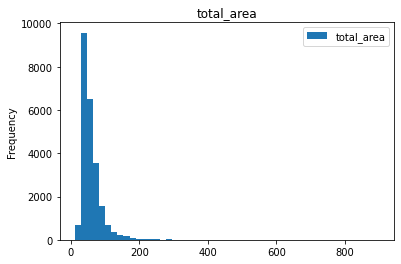

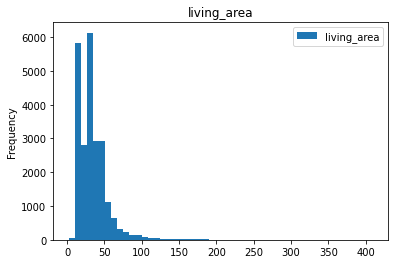

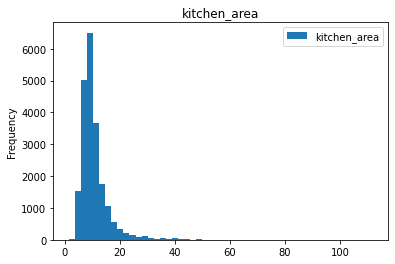

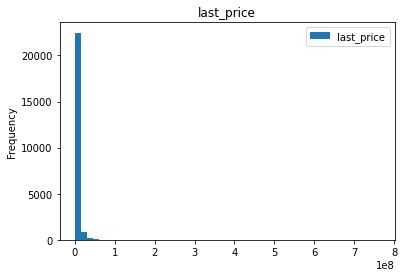

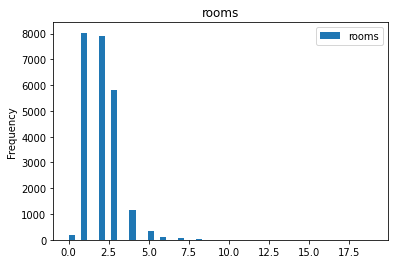

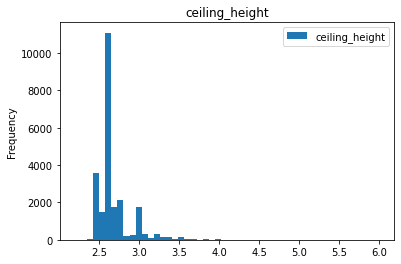

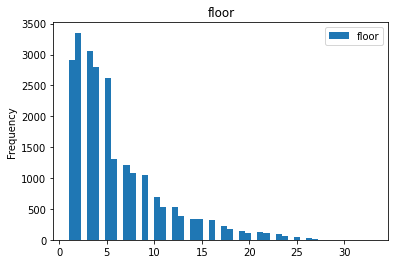

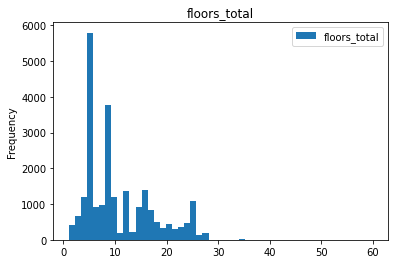

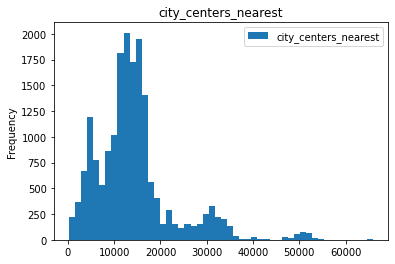

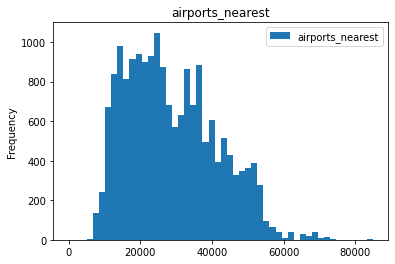

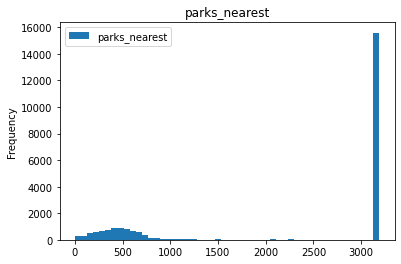

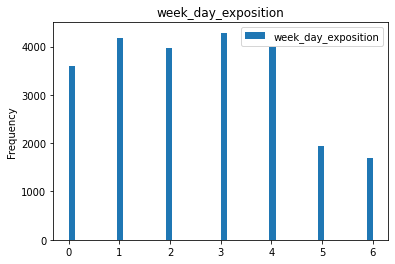

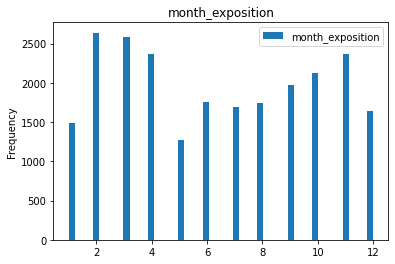

In [26]:
data.columns
parametrs = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms'
            , 'ceiling_height', 'floor', 'floors_total', 
            'city_centers_nearest', 'airports_nearest', 'parks_nearest', 'week_day_exposition', 'month_exposition']
for i in parametrs:
    data.plot(y= i , kind='hist', bins=50, title= i)


    

<div class="alert alert-block alert-info">
<b>* общая площадь - распределение общей площади похоже на Пуассоновское, и это отличный резултат. Чаще всего встречаются квартиры с площадью от 50 до 100 кв м. жилая площадь - здесь мы видим 2 пика между 10 и 50 м кв, это может говорить о 2 типах планировки жилой площади.  площадь кухни - также имеет Пуассоновское распределение, самое частое значение 10 кв м.
 <br>   * цена объекта - распределение цены говорит о том, в основном цены находятся в диапозоне порядка 100000000, но есть некоторые выбивающиеся значения
  <br>  * количество комнат - чаще всего можно встретить квартиру с 1-3 комнатами
<br>    * высота потолков - наиболее распространенная высота потолков в районе 2.6 м
<br>    * этаж квартиры - также можем наблюдать пуассоновское распределение, самые распространенные этажи 1-5
<br>    * общее количество этажей в доме - гистограмма имеет несколько пиков, что может говорить о частоте застройки однотипных домов или о запрете на высокоэтажные постройки в центре Питера
<br>    * расстояние до центра города в метрах - график имеет 2 основных пика. Чаще всего встречаются на расстоянии 10000-20000 м от центра, также есть группа квартир в пределах 5000 м от центра
<br>    * расстояние до ближайшего аэропорта - здесь график довольно разношорстный, но в целом добраться до аэропорта, кажется, всем будет незатруднительно
<br>    * расстояние до ближайшего парка - здесь есть пуассоновское распределение при значениях от 0 - 1000 м, а также выбивающийся столбец для тех квартир, которые находятся дальше всех от парка
<br>    * день и месяц публикации объявления - из этих вух гистгорамм можеем заметить, что обьявления чаще всего размещались в будние дни и осенне-зимний период.    

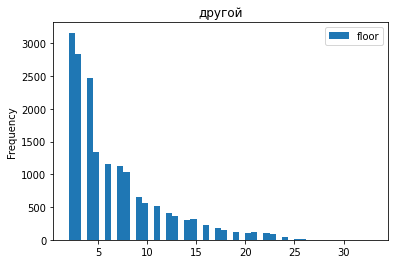

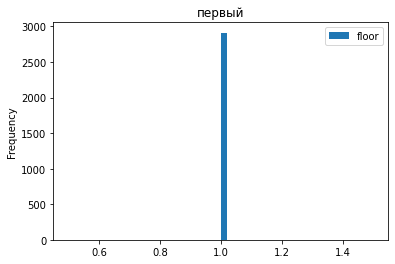

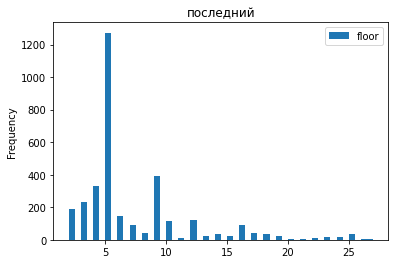

In [27]:
for name, group_data in data.groupby('categorize_floor'):
    group_data.plot(y='floor', kind='hist', bins=50, title= name)

<div class="alert alert-block alert-info">
<b> тип этажа квартиры («первый», «последний», «другой») - распределение "других" этажей похоже на Пуассоновское, в целом эти графики отражают предудущую гистаграмму этажей квартиры, квартир с 1 - 5 этаж все еще больше. Также заметим, что малоэтажных домов довольно много.

#### Как быстро продавлаись квартиры

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

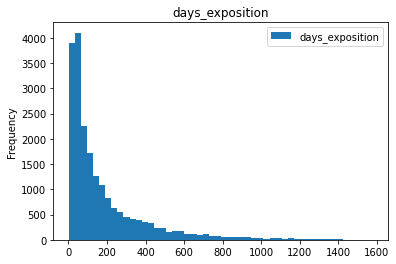

In [28]:
# построим гистограмму для days_exposition (сколько дней было размещено каждое объявление)
data.plot(y='days_exposition', kind='hist',bins=50, title='days_exposition'
         )
# Найдем среднее (mean) и медиану (50%)
data['days_exposition'].describe() 

<AxesSubplot:>

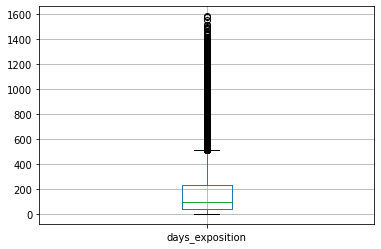

In [29]:
# построим диаграмму размаха, чтобы определить, какие продажи можно считать быстрыми, а какие — необычно долгими

data.boxplot('days_exposition')


<div class="alert alert-block alert-info">
<b>Время продажи в основном занимает от 45 до 231 дня, эти показатели соответсвуют первому и третьему квартилям, медианное значение = 95 дням. Нормальные быстрые значения расположены от 0 до 45 дней, нормальные долгие значения - от 231 до 500 дней, все остальное - это аномально долгие продажи (выбросы)

#### Факторы, влияющие на стоимость обьекта

<div class="alert alert-block alert-info">
<b> Построим матрицу корреляций и диашрамму рассеивания для того, чтобы определить завист ли цена от:
<br> - общей площади;
<br> -жилой площади;
<br> -площади кухни;
<br> -количества комнат;
<br> -этажа, на котором расположена квартира (первый, последний, другой);
<br> -даты размещения (день недели, месяц, год).    

In [30]:
data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

<div class="alert alert-block alert-info">
<b> В столбце 'last_price' можем заметить разделение на 2 группы. Большая группа - это квартиры до 100000000, маленькая - остальные. Уберем из даннных аномальные значения цены, чтобы корректно строить графики зависимости цены от параметров в дальнейшем.

In [31]:
data = data.query('last_price <= 100000000')

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.769134,0.657367,0.592663
total_area,0.769134,1.000000,0.911635,0.593175
living_area,0.657367,0.911635,1.000000,0.399737
kitchen_area,0.592663,0.593175,0.399737,1.000000


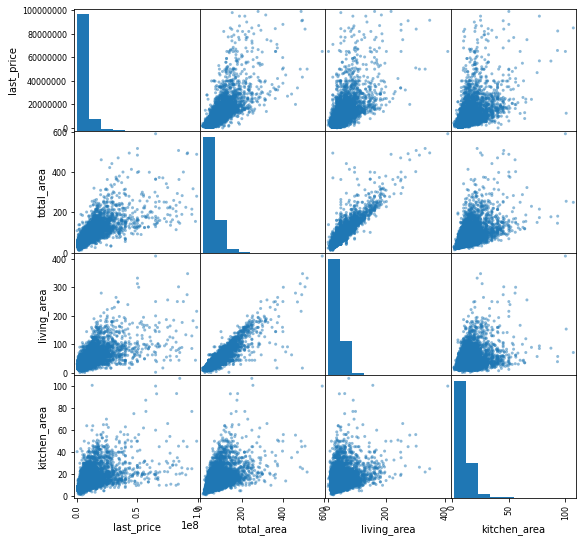

In [32]:
# Построим диаграмму рассеивания матрицы корреляции цены от числовых значений
price_table_area = data[[ 'last_price', 'total_area', 'living_area', 'kitchen_area']]
#price_table.sort_index().head(20)
#price_table.info()
pd.plotting.scatter_matrix(price_table_area, figsize=(9, 9))
price_table_area.corr()

<div class="alert alert-block alert-info">
<b> На диаграмме рассеивания матрицы корреляции можем заметить, что наиболее сильная зависимость наблюдается между величинами цены и общей площади. Также влияет площадь жилой области, кухни.

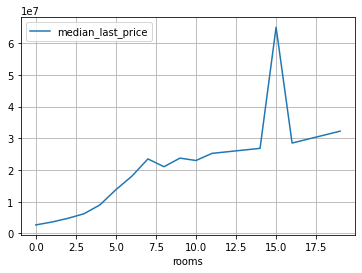

In [36]:
# График зависимости цены от количества комнат
last_price_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['median'])
last_price_rooms.columns = ['median_last_price']
last_price_rooms.plot(grid=True)
plt.show()

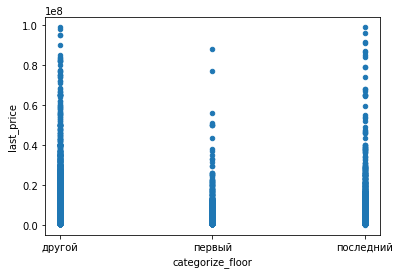

In [38]:
# диаграмма рассеивания для зависисмости цены от этажа, 
#на котором расположена квартира
data.plot(x='categorize_floor', y='last_price', kind='scatter', fig=(9, 9))
plt.show()

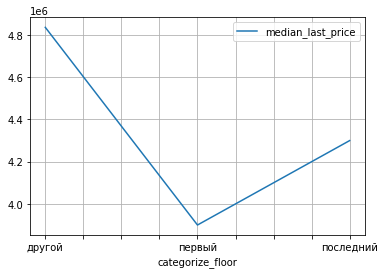

In [40]:
# График зависимости цены от этажа, на котором расположена квартира
last_price_floor = data.pivot_table(index='categorize_floor', values='last_price', aggfunc=['median'])
last_price_floor.columns = ['median_last_price']
last_price_floor.plot(grid=True)
plt.show()

<div class="alert alert-block alert-info">
<b> На диаграмме рассеивания и графике для зависисмости цены от этажа,на котором расположена квартира, можно заметить, что цены на первый этаж самые низкие

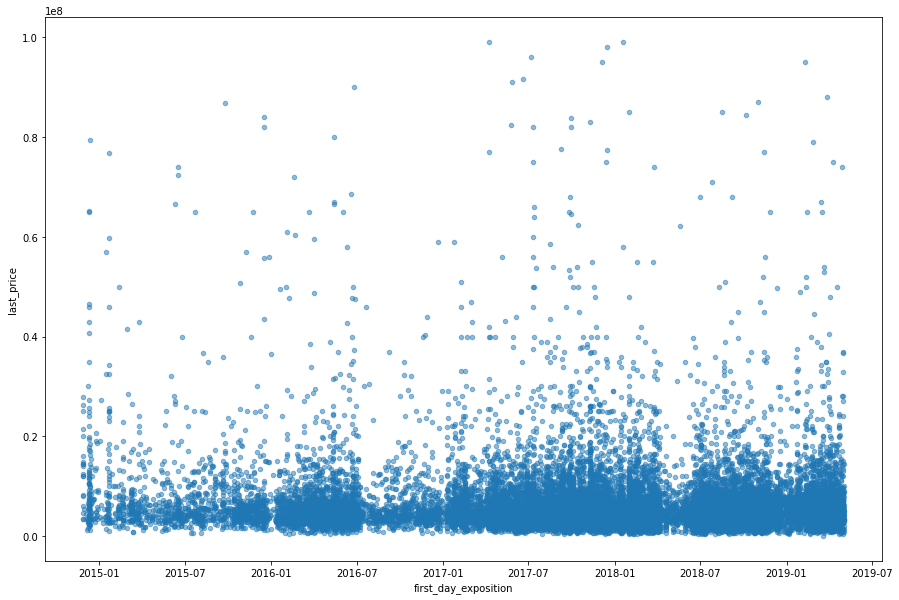

In [41]:
# диаграмма рассеивания для зависисмости цены от даты размещения 
data.plot(x='first_day_exposition', y='last_price', kind='scatter', alpha= 0.5, figsize=(15, 10))
plt.show()

<div class="alert alert-block alert-info">
<b> По диаграммме рассевиания можем заметить, что связь между датой размещения обьявления и ценой существует. Посмотрим подробнее на линейных графиках 

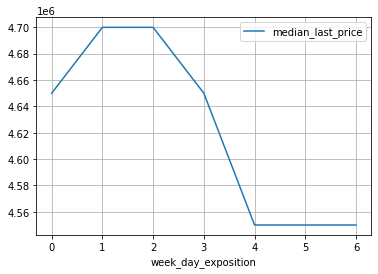

In [43]:
# график зависимости дня размещения и цены
last_price_week_day_exposition = data.pivot_table(index='week_day_exposition', values='last_price', aggfunc=['median'])
last_price_week_day_exposition.columns = ['median_last_price']
last_price_week_day_exposition.plot(grid=True)
plt.show()

<div class="alert alert-block alert-info">
<b> На графике зависимости дня размещения и цены можем заметить, что цены у обьявлений, размещенных в пятницу и выходные - самые низкие

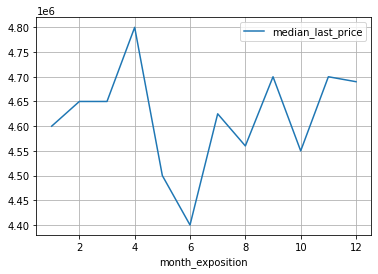

In [44]:
# график зависимости месяца размещения обьявления от цены
last_price_month_exposition = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['median'])
last_price_month_exposition.columns = ['median_last_price']
last_price_month_exposition.plot(grid=True)
plt.show()

<div class="alert alert-block alert-info">
<b> На графике зависимости месяца размещения обьявления от цены можем заметить, что цены у обьявлений, размещенных в мае и июне - самые низкие

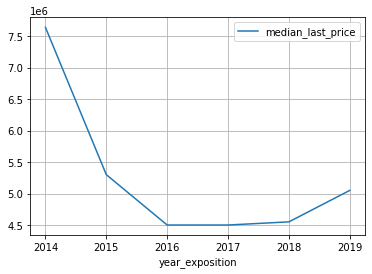

In [45]:
# График зависимости года размещения обьявления от цены
last_price_year_exposition = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['median'])
last_price_year_exposition.columns = ['median_last_price']
last_price_year_exposition.plot(grid=True)
plt.show()

<div class="alert alert-block alert-info">
<b> На графике зависимости года размещения обьявления от цены можем заметить, что с 2014 года цены на квартиру начали ументшаться, но с 2017 прослеживается рост на цены квартир. (хм, что же такое случилось в 2014, что квартиры стали падать в цене? интересно в 2022 цены тоже упали)

#### Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [47]:
# Создаем сводную таблицу
locality_name_table = data.pivot_table(index='locality_name', values='price_for_sq_meter', 
                                      aggfunc=['count', 'mean'])
locality_name_table.columns = ['count_exposition', 'mean_price']

locality_name_table_new = locality_name_table.sort_values(by='count_exposition', ascending=False).head(10)

locality_name_table_new

,count_exposition,mean_price
locality_name,,
Санкт-Петербург,15684,113596.939492
поселок Мурино,556,85681.758993
поселок Шушары,440,78677.379545
Всеволожск,398,68654.474874
Пушкин,369,103125.818428
Колпино,338,75424.571006
поселок Парголово,327,90175.886850
Гатчина,307,68746.110749
деревня Кудрово,299,92473.588629


In [48]:
# Средняя минимальная цена на квартиру в Выборге
locality_name_table_new['mean_price'].min()

58141.919831223626

In [49]:
# Средняя максимальная цена на квартиру оказалась в Санкт-Петербурге
locality_name_table_new['mean_price'].max()

113596.9394924764

array([[<AxesSubplot:title={'center':'count_exposition'}>,
        <AxesSubplot:title={'center':'mean_price'}>]], dtype=object)

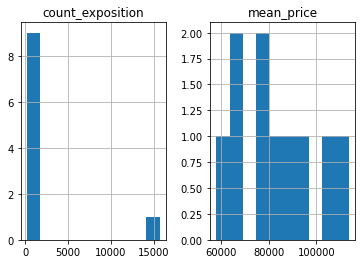

In [50]:
locality_name_table_new.hist()

<div class="alert alert-block alert-info">
<b> Получаем, что в Выборге средняя минимальная цена на квартиру, а средняя максимальная - в Санкт-Петербурге

#### Вычисление средней цены каждого километра до центра в Санкт-Петербурге

In [51]:
# Создаем сводную таблицу
price_km_table = (data.query('locality_name=="Санкт-Петербург"').pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median'))
price_km_table = (price_km_table.drop(labels = [0],axis = 0))
price_km_table = price_km_table.round(1)
price_km_table['price_for_km'] = round(price_km_table['last_price'] /  price_km_table.index )
price_km_table.sort_values(by='price_for_km', ascending=False)



,last_price,price_for_km
city_centers_nearest_km,,
1.0,11200000.0,11200000.0
2.0,10000000.0,5000000.0
3.0,8409000.0,2803000.0
4.0,9190000.0,2297500.0
5.0,9400000.0,1880000.0
6.0,8850000.0,1475000.0
7.0,7800000.0,1114286.0
8.0,7445000.0,930625.0
9.0,5300000.0,588889.0


<div class="alert alert-block alert-info">
<b> Отсортированная таблица по уменьшению цены за км показывает, что чем ближе квартира к центру, тем она дороже. Проиллюстрируем

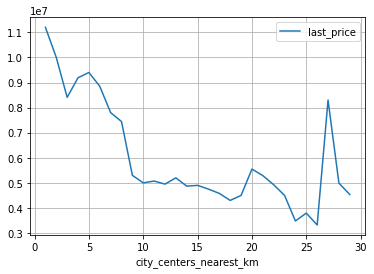

In [52]:
price_km_table.plot(y='last_price', grid=True)
plt.show()

### Общий вывод

<div class="alert alert-block alert-info">
<b> Подведем итоги, на первом этапе была осуществлена предобработка данных. Для начала, избавились от пропусков в тех столбцах, в которых это было возможно. Например, в данных, в которых были пропуски, связанные с ошибками при добавлении пользователя. Также избавились от пропусков в некоторых столбцах с количественными значениями. Далее избавились от неявных дубликатов в названии местности и отфильтровали столбцы с выбивающимеся значениями.
    В таблицу были давлены новые столбцы для полее удобного последуещего анализа зависимостей.
    Также провели исследование многих параметров. Так, получаем:
    <br>* общая площадь - распределение общей площади похоже на Пуассоновское, и это отличный резултат. Чаще всего встречаются квартиры с площадью от 50 до 100 кв м. жилая площадь - здесь мы видим 2 пика между 10 и 50 м кв, это может говорить о 2 типах планировки жилой площади.  площадь кухни - также имеет Пуассоновское распределение, самое частое значение 10 кв м.
 <br>   * цена объекта - распределение цены говорит о том, в основном цены находятся в диапозоне порядка 100000000, но есть некоторые выбивающиеся значения
  <br>  * количество комнат - чаще всего можно встретить квартиру с 1-3 комнатами
<br>    * высота потолков - наиболее распространенная высота потолков в районе 2.6 м
<br>    * этаж квартиры - также можем наблюдать пуассоновское распределение, самые распространенные этажи 1-5
<br>    * общее количество этажей в доме - гистограмма имеет несколько пиков, что может говорить о частоте застройки однотипных домов или о запрете на высокоэтажные постройки в центре Питера
<br>    * расстояние до центра города в метрах - график имеет 2 основных пика. Чаще всего встречаются на расстоянии 10000-20000 м от центра, также есть группа квартир в пределах 5000 м от центра
<br>    * расстояние до ближайшего аэропорта - здесь график довольно разношорстный, но в целом добраться до аэропорта, кажется, всем будет незатруднительно
<br>    * расстояние до ближайшего парка - здесь есть пуассоновское распределение при значениях от 0 - 1000 м, а также выбивающийся столбец для тех квартир, которые находятся дальше всех от парка
<br>    * день и месяц публикации объявления - из этих вух гистгорамм можеем заметить, что обьявления чаще всего размещались в будние дни и осенне-зимний период. 
 <br> Также получили, что время продажи занимает от 45 до 231 дня. 
    Обнаружили, что  что наиболее сильная зависимость наблюдается между величинами цены и общей площади. Также влияет площадь жилой области, кухни. Также в среднем чем больше количесвто комнат в кварите, тем она дороже. Оказалось, что если обьявления выставлены выходные дни, то квартира продасться дешевле. Также неудачными для публикации обьявления явлются месяца май и июнь. Показали, как с 2014 цены начали падать и расти с 2017. Получили, что в Выборге средняя минимальная цена на квартиру, а средняя максимальная - в Санкт-Петербурге. Также показали, что чем ближе квартира к центру, тем она дороже
    

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.